In [5]:
# Generic dependencies
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
from citipy import citipy
from scipy.stats import linregress
from IPython.display import Image, display, Markdown

filepath1= "resources/Airplane_Crashes_and_Fatalities_Since_1908.csv"
filepath2= "resources/airlines.csv"

aircrash_df = pd.read_csv(filepath1)

airline_df = pd.read_csv(filepath2)

In [6]:
display(Markdown('### Air Crash Table - Raw '))
display(Markdown('Data cleansing notes: entries missing in Flight #,\
                  Route, Rego and cn/ln columns.   '))
aircrash_df.head()



### Air Crash Table - Raw 

Data cleansing notes: entries missing in Flight #,                  Route, Rego and cn/ln columns.   

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [7]:
display(Markdown('### Number of entries'))
aircrash_df["Date"].value_counts



### Number of entries

<bound method IndexOpsMixin.value_counts of 0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
           ...    
5263    05/20/2009
5264    05/26/2009
5265    06/01/2009
5266    06/07/2009
5267    06/08/2009
Name: Date, Length: 5268, dtype: object>

In [8]:
display(Markdown('### Number '))
aircrash_df["Flight #"].value_counts

### Number 

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2         -
3       NaN
4       NaN
       ... 
5263    NaN
5264    NaN
5265    447
5266    NaN
5267    NaN
Name: Flight #, Length: 5268, dtype: object>

In [9]:
aircrash_df.dropna()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one..."
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,02/12/2009,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0,The commuter plane crashed while attemptiong t...
5251,02/25/2009,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...
5255,03/23/2009,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0,The cargo plane crashed and burst into flame a...
5259,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...


In [22]:
airline_df.head()

airline_df["Operator"] = airline_df["Name"]
airline_df

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active,Operator
0,-1,Unknown,\N,-,NaN,\N,\N,Y,Unknown
1,1,Private flight,\N,-,NaN,NaN,NaN,Y,Private flight
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N,135 Airways
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y,1Time Airline
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N,2 Sqn No 1 Elementary Flying Training School
...,...,...,...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y,GX Airlines
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N,Lynx Aviation (L3/SSX)
6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y,Jetgo Australia
6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y,Air Carnival


In [20]:
display(Markdown('### Reformat Date to ISO Date'))
from datetime import datetime
aircrash_df["ISO_date"] = pd.to_datetime(aircrash_df["Date"])
aircrash_df["year"] = pd.DatetimeIndex(aircrash_df["ISO_date"]).year


### Reformat Date to ISO Date

In [11]:
aircrash_df["ISO_date"]

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: ISO_date, Length: 5268, dtype: datetime64[ns]

In [12]:
aircrash_df["ISO_date"]
aircrash_df["year"] = pd.DatetimeIndex(aircrash_df["ISO_date"]).year
aircrash_cleaned = pd.DataFrame({
                                  "Date": aircrash_df["ISO_date"],
                                  "Year": aircrash_df["year"],
                                  "Location": aircrash_df["Location"],
                                  "Operator": aircrash_df["Operator"],
                                  "Type": aircrash_df["Type"],
                                  "Aboard": aircrash_df["Aboard"],
                                  "Fatalities": aircrash_df["Fatalities"], 
                                  "Summary": aircrash_df["Summary"]
                                })


 # Bar Chart: Crashes by Year

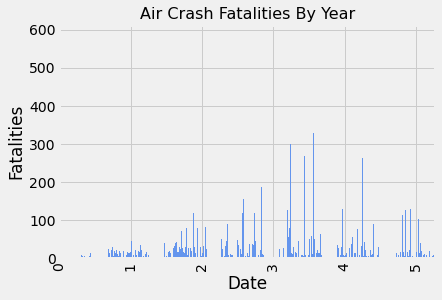

In [13]:
display(Markdown(" # Bar Chart: Crashes by Year"))
#fig = plt.figure();

# Configure chart with title and labelled axis
from matplotlib import style as style

def bar_chart(y, title, xlabel, ylabel):
    style.use('fivethirtyeight')
    y.plot(kind='bar', color= 'cornflowerblue', width=.75);
    plt.title(title,fontsize =16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(0, len(y), step=1000))

    return plt.show()


bar_chart(aircrash_cleaned["Fatalities"],"Air Crash Fatalities By Year","Date","Fatalities")

#math_pass_count = school_data_complete.loc[(school_data_complete["math_score"]>=70),"math_score"].count()



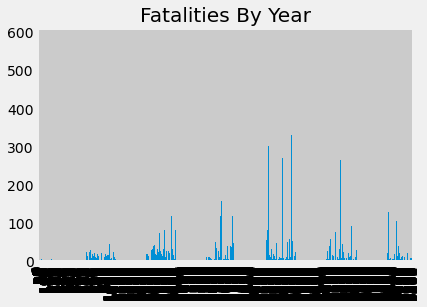

In [14]:
'''
fig1 = plt.figure()
bar_y = aircrash_cleaned["Fatalities"] #.groupby(aircrash_cleaned["Year"]).nunique()
bar_x = aircrash_cleaned["Year"].unique()
labels =  aircrash_cleaned["Year"].unique()
ax=bar_y.plot(y="Fatalities",kind='bar',title='Fatalities By Year')
#ax.set_ylabel("Fatalities")

fig1.savefig('01_Bar.jpg')
'''

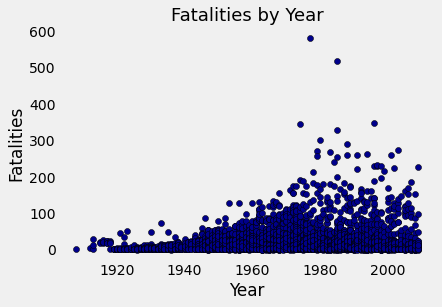

In [60]:
def scatter_plot(x_val, y_val, x_label, y_label):
    
   
    title =  (f"Fatalities by Year")
    # title = (f"{y_label} as a Function of {x_label}")
    
    # Build a scatter plot for each data type
    plt.scatter(x_val, y_val, marker="o", edgecolors="black",facecolors="darkblue")
    
    # Incorporate the other graph properties
    plt.title(title, fontsize = 18)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(False)

    # Show plot
    return plt.show()


#Set values for variables required in plotter function
x_label = "Year"
x_val = aircrash_cleaned["Year"]
y_val = aircrash_cleaned["Fatalities"]
y_label = "Fatalities"

#Graph results
scatter_plot(x_val, y_val, x_label, y_label)



 # Histogram

Text(0, 0.5, 'Fatalities')

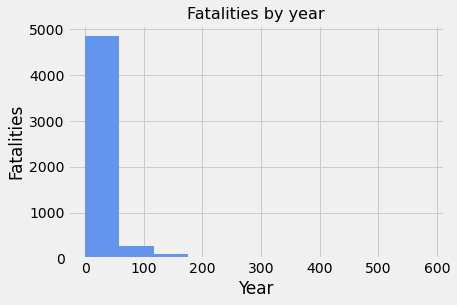

In [61]:
display(Markdown(" # Histogram"))

aircrash_cleaned["Fatalities"].hist(histtype='bar', color = 'cornflowerblue')
plt.title("Fatalities by year",fontsize =16)
plt.xlabel("Year")
plt.ylabel("Fatalities")


In [24]:
test_df = aircrash_cleaned.merge(airline_df, on='Operator')


,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,decade,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,1924-04-24,1924,Over the English Channel,KLM Royal Dutch Airlines,Fokker F.III,3.0,3.0,NaN,1924,3090,KLM Royal Dutch Airlines,\N,KL,KLM,KLM,Netherlands,Y
1,1925-06-25,1925,"Landrécies, France",KLM Royal Dutch Airlines,Fokker (KLM) F.III,4.0,4.0,Crashed in poor weather.,1925,3090,KLM Royal Dutch Airlines,\N,KL,KLM,KLM,Netherlands,Y
2,1926-07-09,1926,"Wolvertem, Belgium",KLM Royal Dutch Airlines,Fokker F-4,2.0,2.0,NaN,1926,3090,KLM Royal Dutch Airlines,\N,KL,KLM,KLM,Netherlands,Y
3,1927-01-12,1927,"Lille, France",KLM Royal Dutch Airlines,Fokker F-VII,2.0,2.0,NaN,1927,3090,KLM Royal Dutch Airlines,\N,KL,KLM,KLM,Netherlands,Y
4,1927-08-22,1927,"Sevenoaks, England",KLM Royal Dutch Airlines,Fokker F-VIII,11.0,1.0,A broken wire led to the partial loss of the t...,1927,3090,KLM Royal Dutch Airlines,\N,KL,KLM,KLM,Netherlands,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2009-01-15,2009,"New York, New York",US Airways,Airbus A320-214,155.0,0.0,The plane was taking off from La Guardia Airpo...,2009,5265,US Airways,\N,US,USA,U S AIR,United States,Y
1180,2009-02-07,2009,"Trigoria, Italy",Air One Executive,Cessna 650 Citation III,2.0,2.0,"The plane, heading to Bologna to pick up a med...",2009,351,Air One Executive,\N,NaN,AOE,,Italy,N
1181,2009-02-25,2009,"Amsterdam, Netherlands",Turkish Airlines,Boeing 737-8F2,134.0,9.0,The plane was on final approach to Runway 18R ...,2009,4951,Turkish Airlines,\N,TK,THY,TURKAIR,Turkey,Y
1182,2009-03-12,2009,"Off St. Johns, Newfoundland",Cougar Helicopters,Sikorsky S-92A,18.0,17.0,The pilot reported a technical malfunction and...,2009,1911,Cougar Helicopters,\N,NaN,CHI,COUGAR,Canada,N
